CMPE 462 Project

Note: Throughout this notebook, you are **not obliged to** fill any function. Provided function headers or codes aim to help you to find a way to the solution. You are free to delete them if that helps.

# Question 3: Decision Trees

In this exercise we will investigate and compare two alternative measures for choosing a 
decision boundary and a feature in decision trees: (a) Gini impurity and (b) Information Gain. 

Suppose there are $C$ classes in a dataset with $N$ samples. The number of examples having class $c$ is
$N_c$ where $\sum_c N_c = N$. 

At each step, a decision tree algorithm tries multiple potential thresholds (remember that as the basic decision tree algorithm looks at a single feature at a time
we only need to consider midpoints) and selects the one that would lead to the "purest" partitions. We will measure 
the impurity by Entropy or the Gini impurity.


A given threshold $\tau$ subdivides the dataset into two partitions of sizes $L$ and $R$
according to a single feature $x$: $L$ data points with $x< \tau$ and $R$ data points with $x \geq \tau$ where $L + R = N$. The number of data points of class $c$ in each partition is $L_c$ and $R_c$. We have $L_1 + L_2 + \dots + L_C = L$ and $R_1 + R_2 + \dots + R_C = R$.

The Gini impurity is defined as:
$$G(p_{1:C}) = 1 - \Sigma_c p_c^2$$
where $p_i$ is the frequency of each class

The entropy, on the other hand is defined as 
$$H(p_{1:C}) =  - \Sigma_c p_c \log{p_c}$$
Note that $\log$ stands for the natural logarithm.

Compute the following indices

### Gini:
$$
U_G(\tau) = \frac{L}{N} G(L_{1:C}/L) + \frac{R}{N} G(R_{1:C}/R)
$$
### Entropy:
$$
U_H(\tau) = \frac{L}{N} H(L_{1:C}/L) + \frac{R}{N} H(R_{1:C}/R)
$$

### Information gain:
$$
I(\tau) = H(N_{1:C}/N) - U_H(\tau)
$$


Given a dataset write a program that plots the scatterplot any two features and computes each index.


In [497]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd
from sklearn.datasets import load_iris

c:\users\sila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
c:\users\sila\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:2508: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)
c:\users\sila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


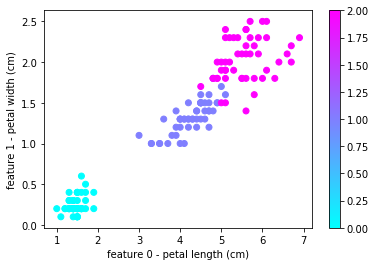

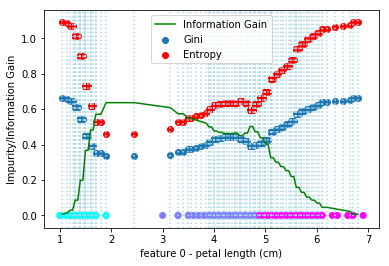

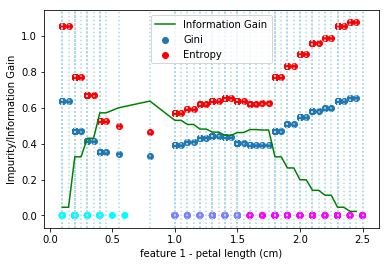

In [498]:
dataset = load_iris()
features, irisclass, cnames, fnames = dataset['data'][:,2:], dataset['target'], dataset['target_names'] , dataset['feature_names']
#M, N = X.shape
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
plt.scatter(features[:,0],features[:,1], c=irisclass, cmap=plt.cm.cool)
cb = plt.colorbar()
ax1.set_xlabel("feature 0 - " + fnames[2])
ax1.set_ylabel("feature 1 - " + fnames[3])

def calculateGini(p_class):
    pc = (p_class/np.sum(p_class,axis=0)).reshape(len(cnames),1)
    Gini = 1-pc.T.dot(pc)
    return Gini
def plotGiniEntr(feat_class, ix):
    N = len(feat_class)
    thresh = np.zeros((len(feat_class)-1,1))
    p_class_left = np.zeros((len(feat_class)-1,len(cnames)))
    p_class_right = np.zeros((len(feat_class)-1,len(cnames)))
    UGini = np.zeros((len(feat_class)-1,1))
    UEnt = np.zeros((len(feat_class)-1,1))
    IG = np.zeros((len(feat_class)-1,1))
    for i in range(len(feat_class)-1):
        th = (feat_class['f'].values[i+1] + feat_class['f'].values[i])/2
        thresh[i] = th
        left = feat_class.loc[feat_class['f'].values <= th]; L=len(left)
        right = feat_class.loc[feat_class['f'].values > th]; R=len(right)
        for j in range(len(cnames)):
            p_class_left[i][j] = len(left.loc[left['c'].values == j])
        for j in range(len(cnames)):
            p_class_right[i][j] = len(right.loc[right['c'].values == j])
        #Gini calculation
        GiniL = calculateGini(p_class_left[i])
        GiniR = calculateGini(p_class_right[i])
        UGini[i] = (L/N)*GiniL + (R/N)*GiniR
        #Entropy calculation
        EntL = sc.stats.entropy(p_class_left[i])
        EntR = sc.stats.entropy(p_class_right[i])
        UEnt[i] = (L/N)*EntL + (R/N)*EntR
        Ent = sc.stats.entropy(p_class_left[i] + p_class_right[i])
        IG[i] = Ent - UEnt[i]
    
    fig = plt.figure(figsize=(6,4))  
    ax2 = fig.add_subplot(111)
    ax2.cla()
    ax2.scatter(feat_class['f'], np.zeros((N,1)), c=irisclass, cmap=plt.cm.cool)
    for x in thresh:
        ax2.axvline(x, color='lightblue',ls=':')
    ax2.scatter(thresh, UGini, label='Gini')
    ax2.scatter(thresh, UEnt, color='red', label='Entropy')
    ax2.plot(thresh,IG, color='green', label='Information Gain')
    #ax2.set_ylim((-0.01,1.5))
    ax2.set_xlabel("feature " + str(ix) + " - " + fnames[2])
    ax2.set_ylabel("Impurity/Information Gain")
    ax2.legend()

f0_class = pd.DataFrame({'f':features[:,0],'c': irisclass }).sort_values(by=['f'], ascending=True)
plotGiniEntr(f0_class,0)
f1_class = pd.DataFrame({'f':features[:,1],'c': irisclass }).sort_values(by=['f'], ascending=True)
plotGiniEntr(f1_class,1)
    

# Question 4: ROC curve and the AUC score

Suppose you are given two probability distributions, each denoting a class conditional density of a feature.

Sample from the distributions and estimate the ROC curve and the AUC (area under the curve) score.

The densities should be 

1. Gaussians with mean $\mu_0$ and variance $V_0$ $\mathcal{N}(\mu_0, V_0)$ and $\mu_1$ and variance $V_1$
1. Symmetric triangular distribution on the inteval $(a_0, b_0)$ and $(a_1, b_1)$

Note that your code should work for any variance and mean value. 
Here are example plots for $\mathcal{N}(0,0.1)$ and $\mathcal{N}(1,0.5)$

![](img/normal.png)
![](img/ROC.png)

In [165]:
#def sample(m0,v0,m1,v1):

def plothist(s0,s1):
    fig = plt.figure(figsize=(6,4))
    h, bins, ignored = plt.hist(s0, 25, normed=True)
    width = (bins[1] - bins[0])
    normed_h = h/np.sum(h*width, axis=0)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins, 1/(v0 * np.sqrt(2 * np.pi)) * np.exp( - (bins - m0)**2 / (2 * v0**2) ), linewidth=2, color='r')
    plt.bar(center, height = normed_h , align='center', width=width, color='green'  )
    
    h, bins, ignored = plt.hist(s1, 25, normed=True)
    width = (bins[1] - bins[0])
    normed_h = h/np.sum(h*width, axis=0)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins, 1/(v1 * np.sqrt(2 * np.pi)) * np.exp( - (bins - m1)**2 / (2 * v1**2) ), linewidth=2, color='r')
    plt.bar(center, height = normed_h , align='center', width=width, color='darkblue' )
    plt.show() 

def estimateClass(val,prior1):
    likelihood1 = np.exp(-np.power(val-m0,2)/(2*v0))*(1/np.sqrt(2*np.pi*v0)) 
    likelihood2 = np.exp(-np.power(val-m1,2)/(2*v1))*(1/np.sqrt(2*np.pi*v1))
    #prior1 = len(s1)/(len(s1)+len(s2))
    #prior1 = np.arange(0.01,1,0.01)
    prior2 = 1 - prior1
    posterior = np.zeros((3,1))
    posterior[0] = (likelihood1*prior1)/(likelihood1*prior1+likelihood2*prior2)
    posterior[1] = (likelihood2*prior2)/(likelihood1*prior1+likelihood2*prior2)
    posterior[2] = val
    c = np.zeros((1,1))
    if posterior[1] == max(posterior[0], posterior[1]):
        c = 1
    return c, posterior

def plothistt(m0,v0,m1,v1):
    c0 =  np.zeros((1000,1)) 
    c1 =  np.ones((1000,1)) 
    s0 = np.random.normal(m0, v0, 1000).reshape(1000,1)
    s1 = np.random.normal(m1, v1, 1000).reshape(1000,1)
    plothist(s0,s1)
    sample = pd.DataFrame(np.vstack((np.hstack((s0,c0)),np.hstack((s1,c1)))), columns=['data','trueclass']).sort_values(by=['data']).reset_index(drop=True)
    #estimated = pd.DataFrame(np.zeros((len(sample),5)), columns=['estimatedclass','tp','tn','fp','fn'])
    tp = np.zeros((99,1))
    tn = np.zeros((99,1))
    fp = np.zeros((99,1))
    fn = np.zeros((99,1))
    
    
    #estClass = np.zeros((len(sample),99))
    for i in range(len(sample)):
        prior1 = np.arange(0.01,1,0.01)
        for idx in range(len(prior1)):
            est, post = estimateClass(sample.values[i][0],prior1[idx])
            #if estimated output and true output are same
            if est == sample.values[i][1]:
                if est == 0:
                    tn[idx]+=1
                else:
                    tp[idx]+=1
            #if estimated output and true output are different
            else:
                if est == 0:
                    fn[idx]+=1
                else:
                    fp[idx]+=1
    fig = plt.figure(figsize=(7,5))
    ax1 = fig.add_subplot(111)
    with plt.style.context(('ggplot')):
        ax1.plot(np.divide(fp,(fp+tn)),np.divide(tp,(fn+tp)))
    
    ax1.set_xlim((0,1.05));ax1.set_ylim((0,1.05))

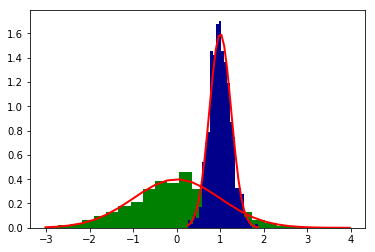

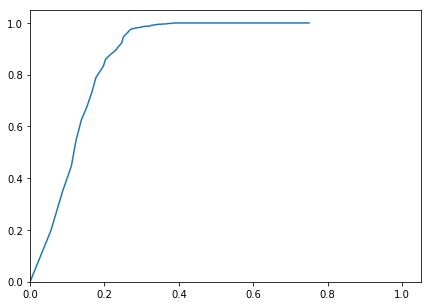

In [166]:
m0=0;v0=1;m1=1;v1=0.25
plothistt(m0,v0,m1,v1)